#### Introduction

The same molecule can be represented by multiple SMILES strings which is a reason that conoical SMILES have been defined which ensures a one to one correspodence betewen SMILES string and molecule. These multiple SMILES can be used as data augmentation of molecules for QSAR model.

Why:: Compare the performance on non-augmented dataset and augmented dataset.

#### Import Required libraries

In [17]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG - True

-1

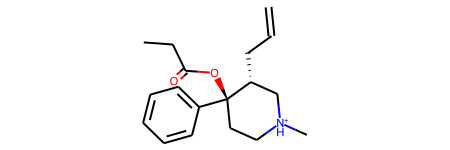

In [2]:
mol1, mol2 = Chem.MolFromSmiles('c1cccc([C@@]2(OC(CC)=O)CC[NH+](C)C[C@H]2CC=C)c1'), Chem.MolFromSmiles('C([C@H]1[C@@](OC(CC)=O)(c2ccccc2)CC[NH+](C)C1)C=C')
mol1

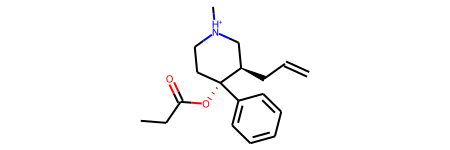

In [3]:
mol2

#### Load data

In [21]:
data = pd.read_csv("DHFR.csv")

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data['smiles_parent'],np.log(data['PC_uM_value']).values.reshape(-1,1),random_state=42)

#### Model

In [25]:
model = Sequential()
model.add(LSTM(64, input_shape=input_shape,dropout = 0.19))
model.add(Dense(output_shape,kernel_regularizer = regularizers.l1_l2(0.005,0.01),activation='linear'))
model.compile(loss='mse',optimizer=RMSprop(lr=0.005))

NameError: name 'input_shape' is not defined